# The New York Times and Fox News Headlines Sentiment Analysis

### For sentiment analysis you need to install textbolb module with conda from [textblob](http://textblob.readthedocs.io/en/dev/install.html). Run program with apscheduler, install from from [apscheduler](http://apscheduler.readthedocs.io/en/latest/userguide.html#installing-apscheduler). 

Developed by Dr. Maria P. Frushicheva @ MIT

# NYT News

In [26]:
trump_nyt = {}
clinton_nyt = {}

def nyt():
    
    # install libraries
    from textblob import TextBlob
    import datetime
    from bs4 import BeautifulSoup
    import urllib2
    import re
    
    # store current date and time
    now = datetime.datetime.now()

    # get headlines from NYT website
    def nyt_news():
        url = 'http://www.nytimes.com/'
        html = urllib2.urlopen(url)
        soup = BeautifulSoup(html,"lxml")
        my_search = soup.find_all(re.compile("h"),class_=re.compile("story-heading"))
        headlines=[]

        for link in my_search:
            try:
                if link.string == None:
                    pass
                else:
                    headline = link.string.strip().encode('ascii','ignore')
                    headlines.append(headline)
                    #print headline
            except:
                pass
        #print headlines

        # sentiment analysis    
        trump_sent = 0
        clinton_sent = 0

        for headline in headlines:
            trump = re.search("Trump",headline)
            clinton = re.search("Clinton",headline)
            if trump:
                sent = TextBlob(headline).sentiment.polarity        
                trump_sent = trump_sent + sent
                #print sent, headline
            if clinton:
                sent = TextBlob(headline).sentiment.polarity
                clinton_sent = clinton_sent + sent
                #print sent, headline

        #print "Current date and time: ", now.strftime("%Y-%m-%d %H:%M")
        #print "Trump sentiment:", round(trump_sent,2)
        #print "Clinton sentiment:", round(clinton_sent,2)
    
        return trump_sent, clinton_sent

    
    # store data in trump and clinton dictionaries
    def nyt_news_collect():
        trump_nyt[now.strftime("%Y-%m-%d %H:%M")] = nyt_news()[0]# trump_sent
        clinton_nyt[now.strftime("%Y-%m-%d %H:%M")] = nyt_news()[1] # clinton_sent
        return trump_nyt, clinton_nyt
    
    return nyt_news_collect()

In [27]:
# run apscheduler
from apscheduler.schedulers.background import BackgroundScheduler
scheduler1 = BackgroundScheduler() # BlockingScheduler()
scheduler1.add_job(nyt, 'interval', minutes=15) #seconds=10) # minutes=2) #hours=1)
scheduler1.start() # start the scheduler

In [28]:
# scheduler1.shutdown() # stop the scheduler

In [77]:
nyt() # check results

In [71]:
# write trump and clinton data in csv files
import csv

trump_dict_nyt= nyt()[0]
clinton_dict_nyt = nyt()[1]
   
fh=open("trump_nyt.csv",'wb')
wr=csv.writer(fh,dialect='excel')
for item in trump_dict_nyt:
    wr.writerow([item,trump_dict_nyt[item]])
fh.close()   

fh=open("clinton_nyt.csv",'wb')
wr=csv.writer(fh,dialect='excel')
for item in clinton_dict_nyt:
    wr.writerow([item,clinton_dict_nyt[item]])
fh.close()  

In [63]:
# Data from 07/29/2016
trump_dict_nyt_07282016 = {'2016-07-28 12:23': 0.18636363636363637, '2016-07-28 12:37': 0.18636363636363637,
 '2016-07-28 12:38': 0.18636363636363637, '2016-07-28 12:40': 0.18636363636363637, '2016-07-28 12:43': 0.18636363636363637,
 '2016-07-28 12:44': 0.18636363636363637, '2016-07-28 12:51': 0.18636363636363637, '2016-07-28 13:40': 0.18636363636363637,
 '2016-07-28 14:46': 0.18636363636363637, '2016-07-28 14:54': 0.18636363636363637, '2016-07-28 15:13': 0.13636363636363635,
 '2016-07-28 15:21': 0.13636363636363635, '2016-07-28 15:42': 0.13636363636363635, '2016-07-28 16:09': 0.13636363636363635,
 '2016-07-28 16:16': 0.13636363636363635, '2016-07-28 16:39': 0.13636363636363635, '2016-07-28 17:05': -0.019191919191919232,
 '2016-07-28 17:16': -0.019191919191919232, '2016-07-28 17:29': -0.019191919191919232, '2016-07-28 17:43': -0.019191919191919232,
 '2016-07-28 17:54': -0.019191919191919232, '2016-07-28 18:01': -0.15555555555555559, '2016-07-28 18:38': -0.15555555555555559,
 '2016-07-28 18:43': -0.15555555555555559, '2016-07-28 18:56': 0.0, '2016-07-28 19:25': 0.3333333333333333, 
 '2016-07-28 19:39': 0.0, '2016-07-28 21:05': 0.0, '2016-07-28 21:06': 0.0}

clinton_dict_nyt_07282016 = {'2016-07-28 12:23': 0.0, '2016-07-28 12:37': 0.0, '2016-07-28 12:38': 0.0,
 '2016-07-28 12:40': 0.0, '2016-07-28 12:43': 0.0, '2016-07-28 12:44': 0.0, '2016-07-28 12:51': 0.0,
 '2016-07-28 13:40': 0.0, '2016-07-28 14:46': -0.2916666666666667, '2016-07-28 14:54': -0.2916666666666667,
 '2016-07-28 15:13': -0.4916666666666667, '2016-07-28 15:21': -0.4916666666666667, '2016-07-28 15:42': -0.4916666666666667,
 '2016-07-28 16:09': -0.4916666666666667, '2016-07-28 16:39': -0.4916666666666667, '2016-07-28 17:05': -0.4916666666666667,
 '2016-07-28 17:16': -0.5416666666666667, '2016-07-28 17:29': -0.5416666666666667, '2016-07-28 17:43': -0.5416666666666667,
 '2016-07-28 17:54': -0.5416666666666667, '2016-07-28 18:01': -0.5416666666666667, '2016-07-28 18:38': -0.5416666666666667,
 '2016-07-28 18:43': -0.5416666666666667, '2016-07-28 18:56': -0.25, '2016-07-28 19:25': -0.25, '2016-07-28 19:39': -0.25,
 '2016-07-28 21:05': -0.13181818181818183, '2016-07-28 21:06': -0.13181818181818183}

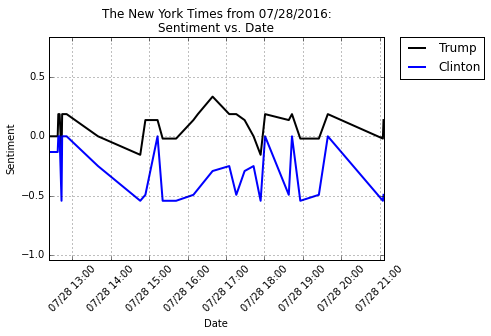

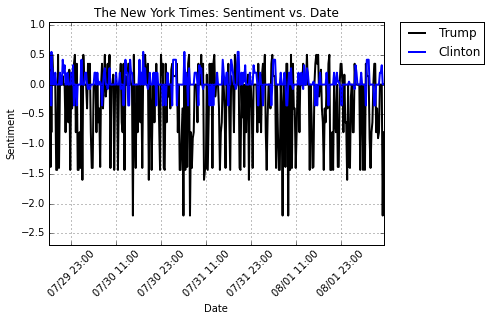

In [72]:
# plot results
import datetime
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import dates

# plot results from 07282016
y_trump_0 = trump_dict_nyt_07282016.values()
y_clinton_0 = clinton_dict_nyt_07282016.values()

y_min=min(min(y_trump_0,y_clinton_0))-0.5
y_max=max(max(y_trump_0,y_clinton_0))+0.5

x_trump_0=[] # set up x-axis
for key in trump_dict_nyt_07282016.keys():
    time=datetime.datetime.strptime(key, "%Y-%m-%d %H:%M")
    x_trump_0.append(time)
x_trump_0.sort()

x_clinton_0=[] # set up x-axis
for key in clinton_dict_nyt_07282016.keys():
    time=datetime.datetime.strptime(key, "%Y-%m-%d %H:%M")
    x_clinton_0.append(time)
x_clinton_0.sort()

x_format=dates.DateFormatter('%m/%d %H:%M')
    
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.plot(x_trump_0,y_trump_0,'k',linewidth=2.0) # plot for Trump 
plt.plot(x_clinton_0,y_clinton_0,'b',linewidth=2.0) # plot for Clinton
plt.title('The New York Times from 07/28/2016:\nSentiment vs. Date')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend(['Trump','Clinton'],bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.axis([None,None,y_min,y_max])
plt.xticks(rotation=45)
ax.xaxis.set_major_formatter(x_format)
plt.grid(True)
plt.show()

# Current Results
trump_dict_nyt= nyt()[0]
clinton_dict_nyt = nyt()[1]

y_trump = trump_dict_nyt.values()
y_clinton = clinton_dict_nyt.values()

y_min=min(min(y_trump,y_clinton))-0.5
y_max=max(max(y_trump,y_clinton))+0.5

x=[] # set up x-axis
for key in trump_dict_nyt.keys():
    time=datetime.datetime.strptime(key, "%Y-%m-%d %H:%M")
    x.append(time)
x.sort()
x_format=dates.DateFormatter('%m/%d %H:%M')
    
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.plot(x,y_trump,'k',linewidth=2.0) # plot for Trump 
plt.plot(x,y_clinton,'b',linewidth=2.0) # plot for Clinton
plt.title('The New York Times: Sentiment vs. Date')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend(['Trump','Clinton'],bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.axis([None,None,y_min,y_max])
plt.xticks(rotation=45)
ax.xaxis.set_major_formatter(x_format)
plt.grid(True)
plt.show()

# Fox News

In [33]:
trump_fox = {}
clinton_fox = {}

def fox():
    
    # install libraries
    from textblob import TextBlob
    import datetime
    from bs4 import BeautifulSoup
    import urllib2
    import re
    
    # store current date and time
    now = datetime.datetime.now()

    # get headlines from Fox News website
    def fox_news():
        url = 'http://www.foxnews.com/'
        html = urllib2.urlopen(url)
        soup = BeautifulSoup(html,"lxml")
        my_search = soup.find_all([re.compile("^h"),"a"])
        headlines=[]

        for link in my_search:
            try:
                if link.string == None:
                    pass
                else:
                    headline = link.string.strip().encode('ascii','ignore')
                    headlines.append(headline)
                    #print headline
            except:
                pass
        #print headlines

        # sentiment analysis    
        trump_sent = 0
        clinton_sent = 0

        for headline in headlines:
            trump = re.search("Trump",headline)
            clinton = re.search("Clinton",headline)
            if trump:
                sent = TextBlob(headline).sentiment.polarity        
                trump_sent = trump_sent + sent
                #print sent, headline
            if clinton:
                sent = TextBlob(headline).sentiment.polarity
                clinton_sent = clinton_sent + sent
                #print sent, headline

        #print "Current date and time: ", now.strftime("%Y-%m-%d %H:%M")
        #print "Trump sentiment:", round(trump_sent,2)
        #print "Clinton sentiment:", round(clinton_sent,2)
    
        return trump_sent, clinton_sent

    
    # store data in trump and clinton dictionaries
    def fox_news_collect():
        trump_fox[now.strftime("%Y-%m-%d %H:%M")] = fox_news()[0]# trump_sent
        clinton_fox[now.strftime("%Y-%m-%d %H:%M")] = fox_news()[1] # clinton_sent
        return trump_fox, clinton_fox
    
    return fox_news_collect()

In [34]:
# run apscheduler
from apscheduler.schedulers.background import BackgroundScheduler
scheduler2 = BackgroundScheduler() # BlockingScheduler()
scheduler2.add_job(fox, 'interval', minutes=15) #seconds=10) # minutes=2) #hours=1)
scheduler2.start() # start the scheduler

In [35]:
# scheduler2.shutdown() # stop the scheduler

In [79]:
fox() # check results

In [74]:
# write trump and clinton data in csv files
import csv

trump_dict_fox= fox()[0]
clinton_dict_fox = fox()[1]
   
fh=open("trump_fox.csv",'wb')
wr=csv.writer(fh,dialect='excel')
for item in trump_dict_fox:
    wr.writerow([item,trump_dict_fox[item]])
fh.close()   

fh=open("clinton_fox.csv",'wb')
wr=csv.writer(fh,dialect='excel')
for item in clinton_dict_fox:
    wr.writerow([item,clinton_dict_fox[item]])
fh.close()  

In [54]:
# Data from 07/28/2016

trump_dict_fox_07282016 = {'2016-07-28 16:38': 1.55,  '2016-07-28 16:39': 1.55,  '2016-07-28 17:05': 1.55,  '2016-07-28 17:16': 1.55,
 '2016-07-28 17:29': 1.55,  '2016-07-28 17:43': 1.55,  '2016-07-28 17:54': 0.8,  '2016-07-28 18:01': 0.8, 
 '2016-07-28 18:38': 0.8, '2016-07-28 18:43': 0.8, '2016-07-28 18:56': 0.8, '2016-07-28 19:25': 0.8,
 '2016-07-28 19:39': 0.8, '2016-07-28 21:06': 0.3375}

clinton_dict_fox_07282016 = {'2016-07-28 16:38': 0.5566666666666671, '2016-07-28 16:39': 0.5566666666666671,
 '2016-07-28 17:05': 0.5566666666666671, '2016-07-28 17:16': 0.5566666666666671, '2016-07-28 17:29': 0.5566666666666671,
 '2016-07-28 17:43': 0.5566666666666671, '2016-07-28 17:54': -0.10999999999999976, '2016-07-28 18:01': -0.10999999999999976,
 '2016-07-28 18:38': -0.10999999999999976, '2016-07-28 18:43': -0.10999999999999976, '2016-07-28 18:56': -0.10999999999999976,
 '2016-07-28 19:25': -1.0199999999999996, '2016-07-28 19:39': -1.0199999999999996, '2016-07-28 21:06': -0.10999999999999976}

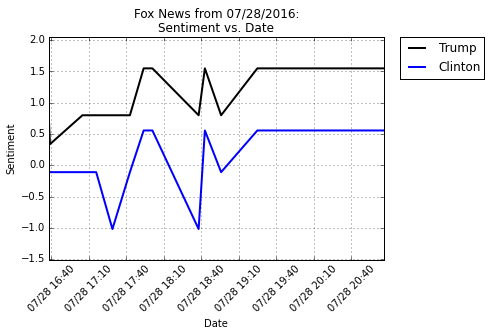

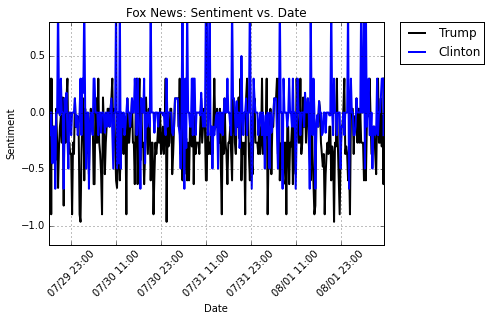

In [75]:
# plot results
import datetime
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import dates

# plot results from 07282016
y_trump_0 = trump_dict_fox_07282016.values()
y_clinton_0 = clinton_dict_fox_07282016.values()

y_min=min(min(y_trump_0,y_clinton_0))-0.5
y_max=max(max(y_trump_0,y_clinton_0))+0.5

x_trump_0=[] # set up x-axis
for key in trump_dict_fox_07282016.keys():
    time=datetime.datetime.strptime(key, "%Y-%m-%d %H:%M")
    x_trump_0.append(time)
x_trump_0.sort()

x_clinton_0=[] # set up x-axis
for key in clinton_dict_fox_07282016.keys():
    time=datetime.datetime.strptime(key, "%Y-%m-%d %H:%M")
    x_clinton_0.append(time)
x_clinton_0.sort()

x_format=dates.DateFormatter('%m/%d %H:%M')
    
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.plot(x_trump_0,y_trump_0,'k',linewidth=2.0) # plot for Trump 
plt.plot(x_clinton_0,y_clinton_0,'b',linewidth=2.0) # plot for Clinton
plt.title('Fox News from 07/28/2016:\nSentiment vs. Date')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend(['Trump','Clinton'],bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.axis([None,None,y_min,y_max])
plt.xticks(rotation=45)
ax.xaxis.set_major_formatter(x_format)
plt.grid(True)
plt.show()

# Current Results
trump_dict_fox= fox()[0]
clinton_dict_fox = fox()[1]

y_trump = trump_dict_fox.values()
y_clinton = clinton_dict_fox.values()

y_min=min(min(y_trump,y_clinton))-0.5
y_max=max(max(y_trump,y_clinton))+0.5

x=[] # set up x-axis
for key in trump_dict_fox.keys():
    time=datetime.datetime.strptime(key, "%Y-%m-%d %H:%M")
    x.append(time)
x.sort()
x_format=dates.DateFormatter('%m/%d %H:%M')
    
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y_trump,'k',linewidth=2.0) # plot for Trump 
plt.plot(x,y_clinton,'b',linewidth=2.0) # plot for Clinton
plt.title('Fox News: Sentiment vs. Date')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend(['Trump','Clinton'],bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.axis([None,None,y_min,y_max])
plt.xticks(rotation=45)
ax.xaxis.set_major_formatter(x_format)
plt.grid(True)
plt.show()